In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, coint
from scipy.stats import pearsonr

In [27]:
data = pd.read_csv("data.csv")
data.columns

Index(['TIMESTAMP', 'LAST_PRICE_HHI', 'TURNOVER_VOLUME_HHI',
       'LAST_BID_PRICE_0_HHI', 'LAST_ASK_PRICE_0_HHI', 'LAST_BID_VOLUME_0_HHI',
       'LAST_ASK_VOLUME_0_HHI', 'LAST_PRICE_HSI', 'TURNOVER_VOLUME_HSI',
       'LAST_BID_PRICE_0_HSI', 'LAST_ASK_PRICE_0_HSI', 'LAST_BID_VOLUME_0_HSI',
       'LAST_ASK_VOLUME_0_HSI'],
      dtype='object')

In [28]:
data['MIDPOINT_HHI'] = (data['LAST_BID_PRICE_0_HHI'] + data['LAST_ASK_PRICE_0_HHI']) / 2
data['MIDPOINT_HSI'] = (data['LAST_BID_PRICE_0_HSI'] + data['LAST_ASK_PRICE_0_HSI']) / 2

# Compute log returns for HHI and HSI
data['LOG_RETURNS_HHI'] = np.log(data['MIDPOINT_HHI'] / data['MIDPOINT_HHI'].shift(1))
data['LOG_RETURNS_HSI'] = np.log(data['MIDPOINT_HSI'] / data['MIDPOINT_HSI'].shift(1))

# Drop rows with NaN values caused by the shift
data.dropna(inplace=True)

data.head()

,TIMESTAMP,LAST_PRICE_HHI,TURNOVER_VOLUME_HHI,LAST_BID_PRICE_0_HHI,LAST_ASK_PRICE_0_HHI,LAST_BID_VOLUME_0_HHI,LAST_ASK_VOLUME_0_HHI,LAST_PRICE_HSI,TURNOVER_VOLUME_HSI,LAST_BID_PRICE_0_HSI,LAST_ASK_PRICE_0_HSI,LAST_BID_VOLUME_0_HSI,LAST_ASK_VOLUME_0_HSI,MIDPOINT_HHI,MIDPOINT_HSI,LOG_RETURNS_HHI,LOG_RETURNS_HSI
1,2021-01-04 09:17:00+08:00,10661.0,340.0,10660.0,10662.0,3.0,3.0,27145.0,452.0,27145.0,27147.0,3.0,2.0,10661.0,27146.0,0.000094,0.000184
2,2021-01-04 09:18:00+08:00,10659.0,214.0,10658.0,10660.0,6.0,3.0,27140.0,370.0,27140.0,27143.0,2.0,2.0,10659.0,27141.5,-0.000188,-0.000166
3,2021-01-04 09:19:00+08:00,10654.0,209.0,10654.0,10655.0,1.0,2.0,27133.0,293.0,27132.0,27135.0,3.0,4.0,10654.5,27133.5,-0.000422,-0.000295
4,2021-01-04 09:20:00+08:00,10660.0,251.0,10658.0,10660.0,12.0,2.0,27127.0,475.0,27126.0,27128.0,1.0,3.0,10659.0,27127.0,0.000422,-0.000240
5,2021-01-04 09:21:00+08:00,10661.0,272.0,10660.0,10662.0,5.0,6.0,27132.0,313.0,27127.0,27130.0,2.0,2.0,10661.0,27128.5,0.000188,0.000055


In [29]:
# Ensure proper timestamp formatting and sorting
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data = data.sort_values(by='TIMESTAMP')

# Calculate Midpoints and Log Returns
data['MIDPOINT_HHI'] = (data['LAST_BID_PRICE_0_HHI'] + data['LAST_ASK_PRICE_0_HHI']) / 2
data['MIDPOINT_HSI'] = (data['LAST_BID_PRICE_0_HSI'] + data['LAST_ASK_PRICE_0_HSI']) / 2
data['LOG_RETURNS_HHI'] = np.log(data['MIDPOINT_HHI'] / data['MIDPOINT_HHI'].shift(1))
data['LOG_RETURNS_HSI'] = np.log(data['MIDPOINT_HSI'] / data['MIDPOINT_HSI'].shift(1))

# Drop NaN values
data.dropna(inplace=True)

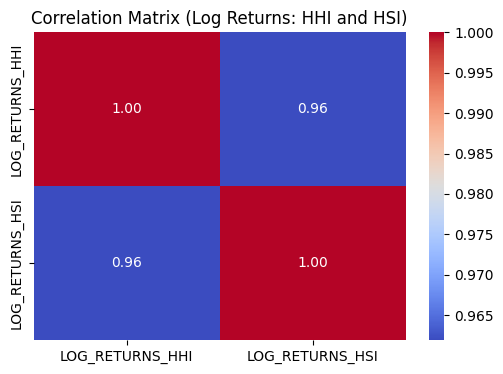


Pearson Correlation between LOG_RETURNS_HHI and LOG_RETURNS_HSI: 0.9619 (p-value: 0.0000)


In [30]:
# Step 2: Correlation Analysis
columns_to_analyze = ['LOG_RETURNS_HHI', 'LOG_RETURNS_HSI']
correlations = data[columns_to_analyze].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix (Log Returns: HHI and HSI)')
plt.show()

# Pearson correlation for LOG_RETURNS_HHI and LOG_RETURNS_HSI
pearson_corr, p_value_corr = pearsonr(data['LOG_RETURNS_HHI'], data['LOG_RETURNS_HSI'])
print(f"\nPearson Correlation between LOG_RETURNS_HHI and LOG_RETURNS_HSI: {pearson_corr:.4f} (p-value: {p_value_corr:.4f})")

In [33]:
# Step 3: Stationarity Test (ADF Test)
def adf_test(series, name):
    adf_stat, p_value, _, _, critical_values, _ = adfuller(series)
    print(f"\nADF Test for {name}:")
    print(f"ADF Statistic: {adf_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Critical Values: {critical_values}")
    if p_value < 0.05:
        print(f"The series {name} is stationary (reject null hypothesis).")
    else:
        print(f"The series {name} is not stationary (fail to reject null hypothesis).")

# Run ADF test for LOG_RETURNS_HHI and LOG_RETURNS_HSI
adf_test(data['LOG_RETURNS_HSI'], 'LOG_RETURNS_HHI')


ADF Test for LOG_RETURNS_HHI:
ADF Statistic: -81.4390
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.430359579743621), '5%': np.float64(-2.8615442341364195), '10%': np.float64(-2.5667722536757127)}
The series LOG_RETURNS_HHI is stationary (reject null hypothesis).


In [34]:
import statsmodels.api as sm

# Regress LOG_RETURNS_HSI on LOG_RETURNS_HHI
X = sm.add_constant(data['LOG_RETURNS_HHI'])  # Add intercept
model = sm.OLS(data['LOG_RETURNS_HSI'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        LOG_RETURNS_HSI   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 8.450e+06
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:27:17   Log-Likelihood:             5.0988e+06
No. Observations:              682722   AIC:                        -1.020e+07
Df Residuals:                  682720   BIC:                        -1.020e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              6.9e-08   1.67e-07     

In [35]:
from statsmodels.tsa.stattools import adfuller

residuals = data['LOG_RETURNS_HSI'] - (0.8344 * data['LOG_RETURNS_HHI'])  # Use the regression coefficient
adf_stat, p_value, _, _, critical_values, _ = adfuller(residuals)

print("\nADF Test on Residuals:")
print(f"ADF Statistic: {adf_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Values: {critical_values}")



ADF Test on Residuals:
ADF Statistic: -103.0242
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.430359579266494), '5%': np.float64(-2.8615442339255353), '10%': np.float64(-2.566772253563467)}


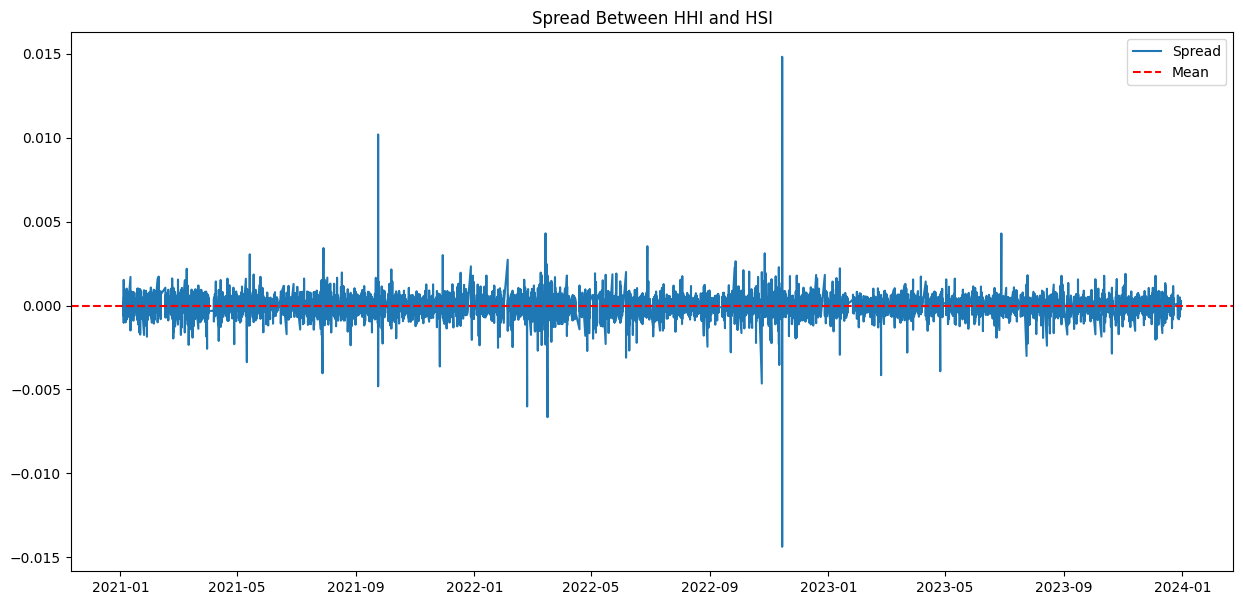

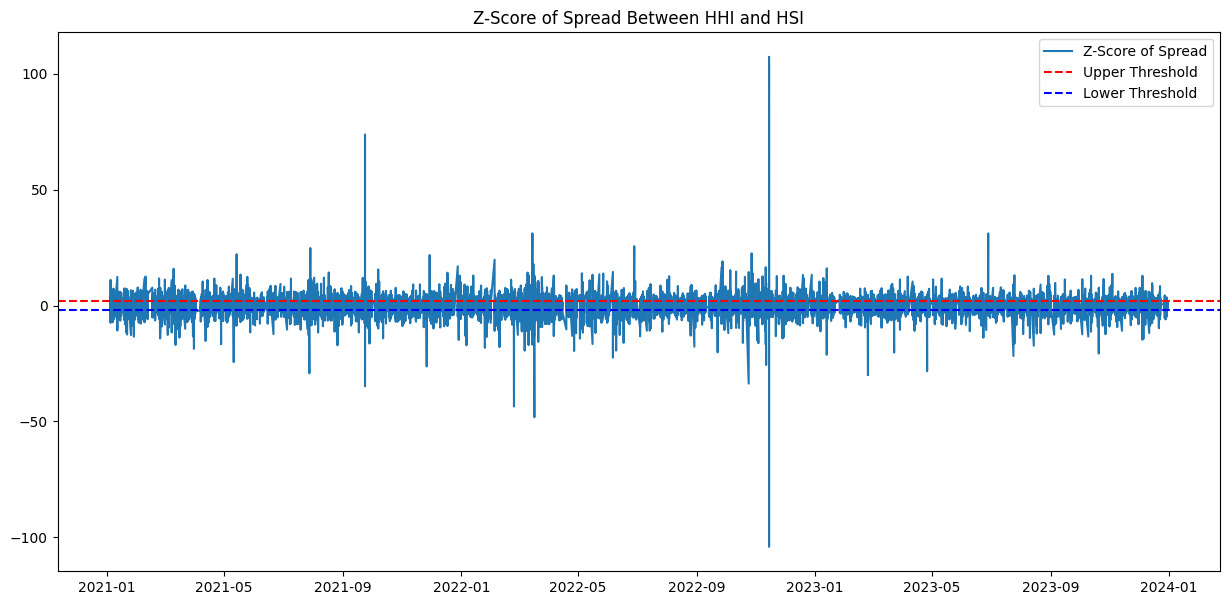

In [37]:
data['SPREAD'] = residuals
data['Z_SPREAD'] = (data['SPREAD'] - data['SPREAD'].mean()) / data['SPREAD'].std()

# Plot the spread and its z-scores
plt.figure(figsize=(15, 7))
plt.plot(data['TIMESTAMP'], data['SPREAD'], label='Spread')
plt.axhline(0, color='red', linestyle='--', label='Mean')
plt.title('Spread Between HHI and HSI')
plt.legend()
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(data['TIMESTAMP'], data['Z_SPREAD'], label='Z-Score of Spread')
plt.axhline(2, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(-2, color='blue', linestyle='--', label='Lower Threshold')
plt.title('Z-Score of Spread Between HHI and HSI')
plt.legend()
plt.show()

In [38]:
# Save the full dataframe to a CSV file
data.to_csv("processed_data.csv", index=False)
print("Full DataFrame saved to 'processed_data.csv'.")


Full DataFrame saved to 'processed_data.csv'.


In [39]:
# Define the split ratio
train_ratio = 0.75  # 75% training, 25% testing

# Calculate the split index
split_index = int(len(data) * train_ratio)

# Split the data into train and test sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Save train and test sets to CSV files
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

Training set saved to 'train_data.csv', testing set saved to 'test_data.csv'.


In [40]:
# Load the training data
train_data = pd.read_csv("train_data.csv")

# Display basic information
print("Training Data Summary:")
print(train_data.info())
print("\nFirst few rows of the training data:")
print(train_data.head())


Training Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512041 entries, 0 to 512040
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TIMESTAMP              512041 non-null  object 
 1   LAST_PRICE_HHI         512041 non-null  float64
 2   TURNOVER_VOLUME_HHI    512041 non-null  float64
 3   LAST_BID_PRICE_0_HHI   512041 non-null  float64
 4   LAST_ASK_PRICE_0_HHI   512041 non-null  float64
 5   LAST_BID_VOLUME_0_HHI  512041 non-null  float64
 6   LAST_ASK_VOLUME_0_HHI  512041 non-null  float64
 7   LAST_PRICE_HSI         512041 non-null  float64
 8   TURNOVER_VOLUME_HSI    512041 non-null  float64
 9   LAST_BID_PRICE_0_HSI   512041 non-null  float64
 10  LAST_ASK_PRICE_0_HSI   512041 non-null  float64
 11  LAST_BID_VOLUME_0_HSI  512041 non-null  float64
 12  LAST_ASK_VOLUME_0_HSI  512041 non-null  float64
 13  MIDPOINT_HHI           512041 non-null  float64
 14  MIDPOINT_HSI 